# Projet Python Data Analysis

Le but de ce projet est de prédire le nombre de vélos loués à Séoul pendant un certain jours. 
Pour cela, un jeu de données contenant le nombre de vélos publics loués à chaque heure à Séoul nous est fourni. 
Il s'agit d'un problème de régression. Nous allons d'abord explorer les données, les préparer puis les visualiser. 
Nous pourrons ensuite utiliser des modèles de prédiction.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import pickle
from sklearn.externals import joblib
from sklearn.preprocessing import OneHotEncoder

## Import Data

In [7]:
df = pd.read_csv("SeoulBikeData.csv",encoding='unicode_escape')

In [8]:
df.shape

(8760, 14)

In [9]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
typecol=[type(df[x]) for x in df.columns]

In [11]:
df.dtypes #changer type des variables

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [12]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


## Exploration Data & Feature Engineering:

On va d'abord regarder si le dataframe contient des valeurs nulles ou des valeurs incohérentes.

In [13]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Il n'y a pas de valeurs nulles, voyons si il existe des colonnes constantes ou des colonnes binaires : 

In [15]:
coluniqueval=[x for x in df.columns if len(df[x].unique())<3 ]

In [16]:
coluniqueval

['Holiday', 'Functioning Day']

In [17]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [18]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

On a donc trouvé 2 colonnes binaires et 0 colonnes constantes, on va pouvoir les encoder par la suite.
Nous avons un dataset plutôt propre à ce niveau. Du coup, regardons de plus près les variables et leurs significations.

### Date

Commençons par les features liées à la date. On va d'abord convertir le type de la colonne en timestamp. Puis nous pourrons ajouter les colonnes month,year et week_day.

In [19]:
olddf=df.copy()

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [21]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day
df['week_day'] = df['Date'].dt.day_name()

In [22]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,week_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday


Regardons maintenant l'évolution des vélos loués en fonction de la date. Pour cela, on fait la somme de tous les vélos loués pour une date donné et on affiche la graphique correspondant.

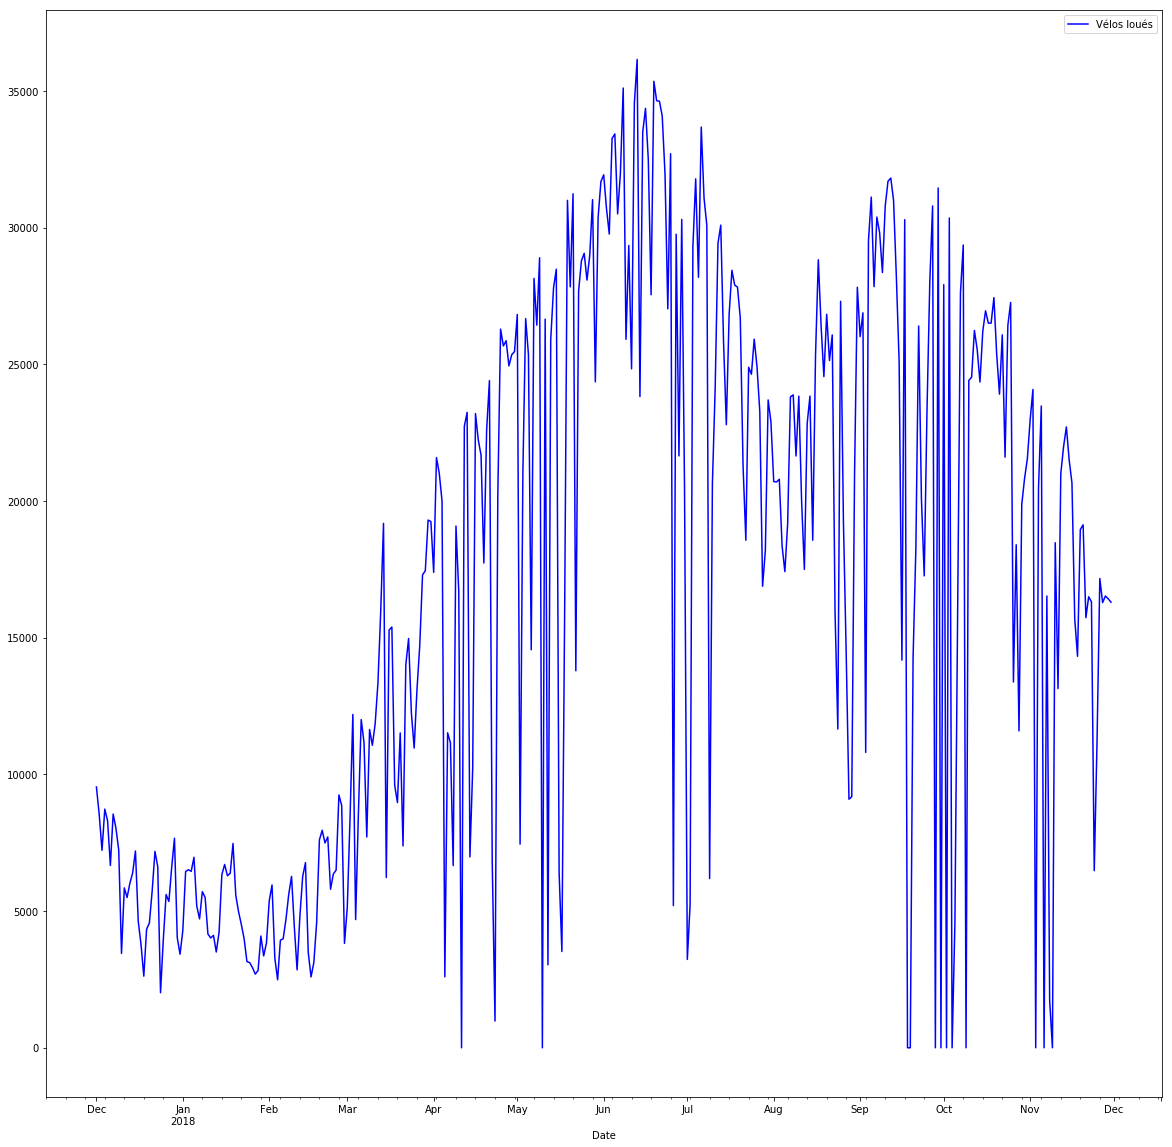

In [23]:
a=df.groupby('Date')['Rented Bike Count'].sum().reset_index()
a.plot(x='Date', y='Rented Bike Count',kind='line', color='blue', label='Vélos loués',figsize=(20,20))


On peut voir qu'il y a eu une forte évolution au cours de l'année avec un pic en Juin et un second pic en Septembre puis on voit une baisse en fin d'année. En effet, de Mars à Juin, on observe une forte augmentation qui peut correspondre au retour du beau temps (et donc des locations plus nombreuses) puis une baisse pendant les vacances d'été et une reprise à la rentrée de Septembre. On aperçoit aussi certains jours où le nombre de location est de 0 ce qui est un peu curieux. Essayons de voir à cela correspond:

In [24]:
dfwith0location=df[df['Rented Bike Count']==0]  
dfwith0location

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,week_day
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.00,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3149,2018-04-11,0,5,9.7,84,1.7,447,7.1,0.00,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3150,2018-04-11,0,6,9.0,86,2.0,442,6.7,0.00,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3151,2018-04-11,0,7,8.8,85,1.1,438,6.4,0.11,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3152,2018-04-11,0,8,9.7,77,1.6,519,5.8,0.68,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday
3153,2018-04-11,0,9,11.8,59,2.1,975,4.0,1.44,0.0,0.0,Spring,No Holiday,No,2018,April,11,Wednesday


In [25]:
dfwith0location['Rented Bike Count'].unique()

array([0], dtype=int64)

In [26]:
dfwith0location['Functioning Day'].unique()

array(['No'], dtype=object)

On peut voir que tous les lignes où le nombre de location est égale à 0 correspond à un 'Functioning Day' = NO ce qui correspond à un jour où le système de location de vélo ne fonctionnait pas. Vérifions cela : 

In [27]:
df.groupby(['Functioning Day'])['Rented Bike Count'].count()

Functioning Day
No      295
Yes    8465
Name: Rented Bike Count, dtype: int64

### Suppresion des lignes 'Functioning Day'=NO

En effet, les 295 lignes, où le nombre de vélos loués est égale à 0, correpondent à des 'Functioning Day' = NO. Il vaut donc mieux supprimer ces lignes de notre dataset car cela pourrait fausser nos futurs prédictions. On peut donc à l'évidence considérer que si 'Functioning Day'=NO, il n'y a pas de location de vélos.

In [28]:
df=df[df['Functioning Day'] == 'Yes'].drop('Functioning Day', axis=1)

On a bien le bon nombre de lignes, on peut maintenant revoir le graphique de l'évolution des location selon la date:

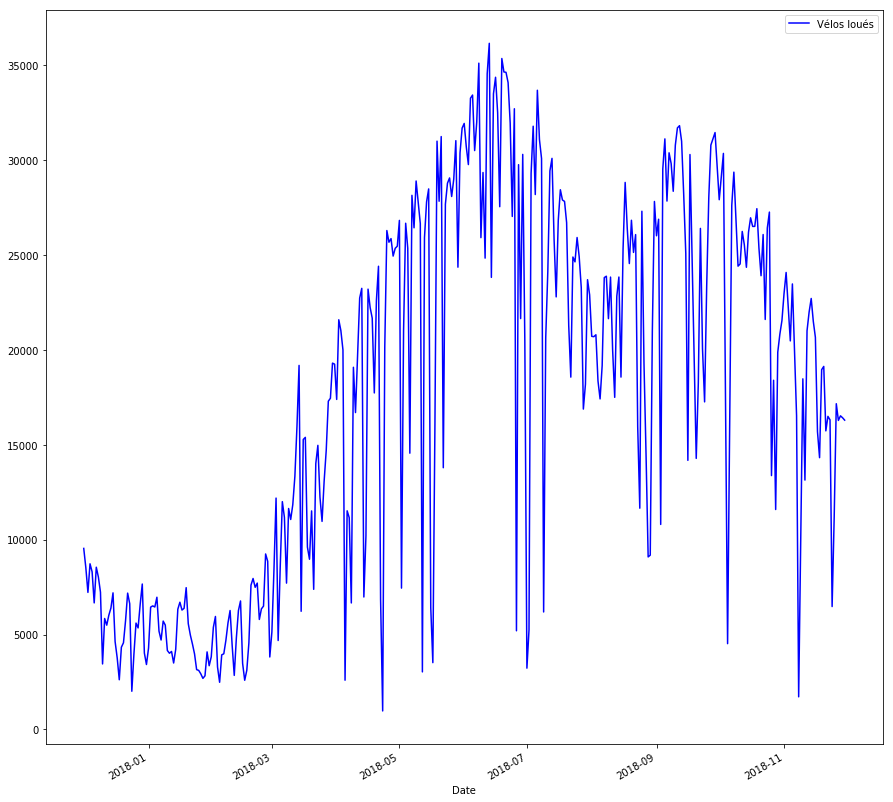

In [29]:
a=df.groupby('Date')['Rented Bike Count'].sum().reset_index()
a.plot(x='Date', y='Rented Bike Count',kind='line', color='blue', label='Vélos loués',figsize=(15,15))

### Month

Regardons à présent un diagramme réprésentant l'évolution du nombre de location au cours des mois: 

In [30]:
m=df.groupby('month')['Rented Bike Count'].mean().sort_values( ascending = False)
m

month
June         1245.676389
September    1079.506410
July          987.177419
May           982.066667
October       978.458647
August        876.192204
April         753.199713
November      718.695988
March         511.551075
December      249.099462
February      225.941964
January       201.620968
Name: Rented Bike Count, dtype: float64

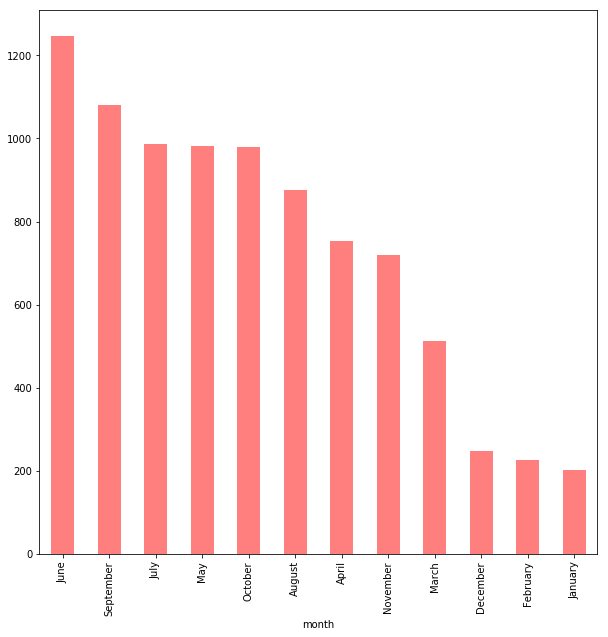

In [31]:
m.plot(x='Month', y='Rented Bike Count',kind='bar', color='red', label='Vélos loués',figsize=(10,10),alpha=0.5)

Comme on a pu le voir sur le précédent graphique, les mois où il y a plus de vélos loués, sont les mois de Juin et Septembre. On peut voir qu'il y a peu de vélos loués pendant la période hivernal, cest-à-dire pour les mois de Decembre, Janvier et Février.

### Week Day & Hour

Voyons comment évolue la location de vélos selon les jours de la semaine et selon l'heure : 

In [32]:
pd.crosstab(df['Hour'],
            df['week_day'], 
            values=df['Rented Bike Count'], 
            aggfunc='mean').style.background_gradient(cmap='PuBu')

week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,549.882,459.577,690.1,651.373,540.86,512.917,526.06
1,448.608,296.173,621.06,475.961,431.38,412.083,412.02
2,298.392,199.865,456.56,365.49,301.04,282.042,288.52
3,200.373,132.769,311.78,256.235,191.68,184.938,199.5
4,130.431,103.154,192.22,157.078,123.7,124.688,131.76
5,153.373,157.423,144.4,106.863,148.02,152.479,147.34
6,360.02,370.346,194.04,134,333.96,362.688,333.98
7,783.569,797.481,300.922,209.255,733.2,817.792,756.56
8,1337.96,1268.9,496.667,344.922,1244.4,1382.67,1300.06


Sur ce tableau croisé, on peut voir comment évolue la location de vélos en fonction du jour de la semaine et en fonction de l'heure. Cette représentation est très intéressante car elle permet de voir les habitudes des habitants de Séoul. En effet, on peut voir que en semaine les chiffres sont assez similaires et qu'il y a des pics à 7-8h et 17-18-19h ce qui correspond plutôt bien aux horaires de travail. Le Samedi et le Dimanche sont les jours où il y a le plus de locations mais à des heures différentes de la semaine. Le week-end, les locations interviennent plutôt en début d'après-mid-, vers 11h. On n'aperçoit pas le pic de 8-9h le week-end, signe que certains Séoulites ne travaillent pas le week-end.  


Regardons deux petits diagrammes pour confirmer nos observations:

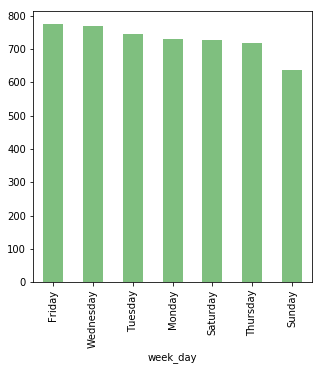

In [33]:
mo=df.groupby('week_day')['Rented Bike Count'].mean().sort_values( ascending = False)
mo.plot(x='Week Day', y='Rented Bike Count',kind='bar', color='green', label='Vélos loués',figsize=(5,5),alpha=0.5)
plt.savefig('image.png')

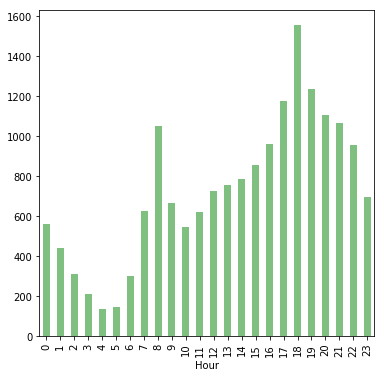

In [34]:
ho=df.groupby('Hour')['Rented Bike Count'].mean()#.sort_values( ascending = False)
ho.plot(x='Hour', y='Rented Bike Count',kind='bar', color='green', label='Vélos loués',figsize=(6,6),alpha=0.5)

Concernant les heures, nos observations se confirment, par contre concernant les jours de la semaine, le résultat est plutôt homogène. En effet, on voit une stabilité autour de 700 locations en moyenne mis à part le Dimanche qui est en dessous de 700.

#### Month, WeekDay Encoder

Pour finir sur la partie Date, faisons quelques modifications sur les features :

-Suppression de la colonne 'Date' car on a à présent 'day','month','year','week_day'

-On encode de deux façon le month et le weekday : Label Encoder et One Hot Encoder 

On pourra comparer ces deux encodages sur le résultat de nos modèles.

In [35]:
#Dataset avec Month et WeekDay Label Encoder
dict_wday = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
dict_month = {1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'}
df['month'] = df['Date'].dt.month
df['week_day'] = df['Date'].dt.dayofweek

#Suppression du Feature Date
df = df.drop('Date', axis=1)

#Dataset avec Month et WeekDay One Hot Encoder
month=pd.get_dummies(df['month'].apply(lambda x:dict_month[x]))
dfmonthwdaydummies=pd.concat([df, month], axis = 1) 
dfmonthwdaydummies = dfmonthwdaydummies.drop('month', axis=1)
wday=pd.get_dummies(df['week_day'].apply(lambda x:dict_wday[x]))
dfmonthwdaydummies=pd.concat([dfmonthwdaydummies, wday], axis = 1) 
dfmonthwdaydummies = dfmonthwdaydummies.drop('week_day', axis=1)


### Holidays

Regardons maintenant si les Séoulites louent plus de vélos pendant les vacances ou bien l'inverse.

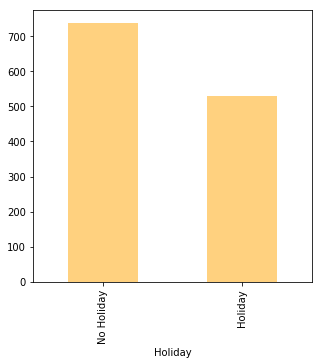

In [36]:
ho=df.groupby('Holiday')['Rented Bike Count'].mean().sort_values( ascending = False)
ho.plot(x='Holiday', y='Rented Bike Count',kind='bar', color='orange', label='Vélos loués',figsize=(5,5),alpha=0.5)

Ce la confirme nos observations précédentes, à savoir que les habitants de Séoul louent beaucoup de vélos en dehors des vacances surêment pour aller travailler ou aller à l'école.

#### Holidays Encoder

Pour le feature 'Holiday', on encode de façon binaire :

In [37]:
df['Holiday'] = (df['Holiday'] == "Holiday").astype(int)
dfmonthwdaydummies['Holiday'] = (dfmonthwdaydummies['Holiday'] == "Holiday").astype(int)

### Seasons

Observons maintenant l'impact des saisons sur les locations de vélos, même si l'on a pu avoir un petit aperçu à l'aide des mois. Cette colonne pourrait d'ailleurs être considéré comme redondante en information car nous possedons déjà la date.

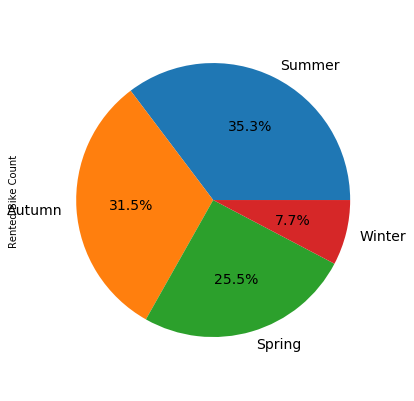

In [38]:
so=df.groupby('Seasons')['Rented Bike Count'].mean().sort_values( ascending = False)
so.plot(kind='pie', startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 14
                          ,radius = 0.9,table = False,figsize=(7,7))

En effet, cela correspond aux graphiques que l'on a pu voir sur les mois. On voit un net écart entre l'hiver et les autres saisons. Il y a très peu de locations de vélos en hiver alors qu'en été et en printemps, il y en a quasiment 5 fois plus. Cela est sûrement aux conditions météos. Regardons cela plus en détails.

#### Seasons One Hot Encoder

Pour notre modèle, on décide de one hot encoder le feature Seasons, il n'y a pas de relation numérique entre les saisons.

In [39]:
season_encoder = OneHotEncoder()
season_encoder.fit(df[['Seasons']])
season_file_name='season.pkl'
joblib.dump(season_encoder,season_file_name)  #pour déploiement du modèle

['season.pkl']

In [40]:
seasons=pd.get_dummies(df['Seasons'])
df=pd.concat([df, seasons], axis = 1) 
df = df.drop('Seasons', axis=1)
dfmonthwdaydummies=pd.concat([dfmonthwdaydummies, seasons], axis = 1) 
dfmonthwdaydummies = dfmonthwdaydummies.drop('Seasons', axis=1)

### Temperature

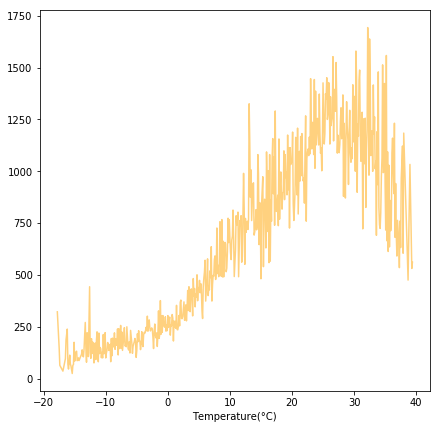

In [41]:
temp=df.groupby('Temperature(°C)')['Rented Bike Count'].mean()
temp.plot(x='Temperature(°C)', y='Rented Bike Count',kind='line', color='orange', label='Vélos loués',figsize=(7,7),alpha=0.5)

Sur ce graphique, on voit bien que les vélos sont souvent loués quand il fait température plutôt agréable entre 20 et 30 °C. Les locations de vélos baissent fortement qaund il fait froid ou que les températures commencent à être très élevé.

### Rainfall & Snowfall

La pluie et la neige peuvent être déterminant dans la location de vélo ou non. En effet, rouler en vélo quand il pleut ou il neige peut être compliqué et entrainé une baisse des locations de vélo. Pour représenter, ces informations nous enlevons les données où la pluie et la neige tombé sont égale à 0 mm ou cm.

In [42]:
rain=df.groupby('Rainfall(mm)')['Rented Bike Count'].sum().reset_index()
rain_true=rain[rain['Rainfall(mm)']>0]
snow=df.groupby('Snowfall (cm)')['Rented Bike Count'].sum().reset_index()
snow_true=snow[snow['Snowfall (cm)']>0]

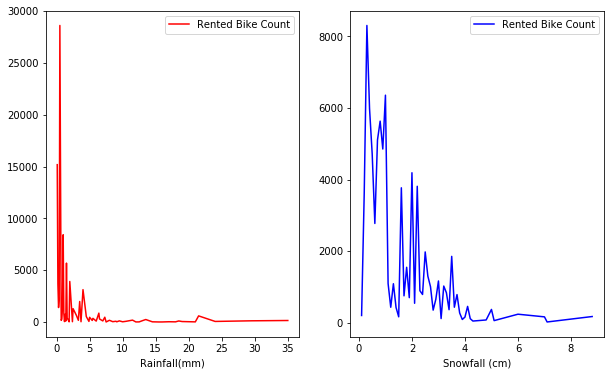

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
rain_true.plot(x='Rainfall(mm)', y='Rented Bike Count',kind='line', color='red',ax=ax)
snow_true.plot(x='Snowfall (cm)', y='Rented Bike Count',kind='line', color='blue', ax=ax2)

Sur ces graphiques, on voit bien que les locations décroit de façon exponentielle si il commence à neiger ou à pleuvoir quelques millimètres. Nos suggestions semblent donc se confirmer.

### Humidity, Wind speed,Visibility & Solar Radiation

Voyons 4 derniers features concernant la météo qui peuvent influencer les locations de vélos à savoir l'humidité, la vitesse du vent, la visibilité et les radiations solaires.

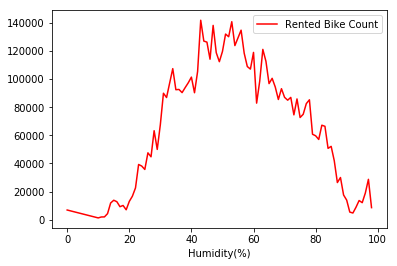

In [44]:
humidity=df.groupby('Humidity(%)')['Rented Bike Count'].sum().reset_index()
humidity.plot(x='Humidity(%)', y='Rented Bike Count',kind='line', color='red')

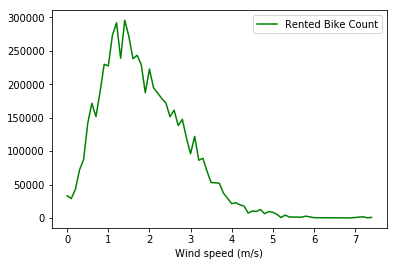

In [45]:
wind=df.groupby('Wind speed (m/s)')['Rented Bike Count'].sum().reset_index()
wind.plot(x='Wind speed (m/s)', y='Rented Bike Count',kind='line', color='green')

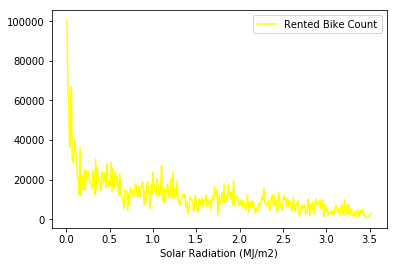

In [46]:
solarrad=df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].sum().reset_index()
solarrad_true=solarrad[solarrad['Solar Radiation (MJ/m2)']>0]
solarrad_true.plot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count',kind='line', color='yellow')

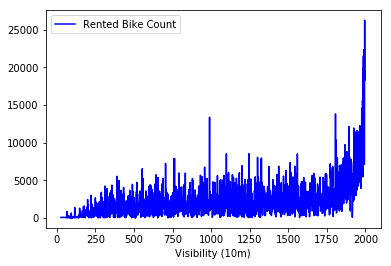

In [47]:
visibility=df.groupby('Visibility (10m)')['Rented Bike Count'].sum().reset_index()
visibility_true=visibility[visibility['Visibility (10m)']<2000]
visibility_true.plot(x='Visibility (10m)', y='Rented Bike Count',kind='line', color='blue')

Cela nous montre des relations très explicites entre le nombre de location et ces features. On voit qu'une humidité moyenne entre 20 et 60% entraîne une augmentation du nombre de vélos alors que les valeurs extrêmes montrent une baisse signifiative (humidité très basse : forte chaleur et humidité très haute : pluie forte possible). Cela est un peu similaire avec le vent, les valeurs extrêmes montrent une baisse des locations de vélos. Concernant les radiations solaires, plus elles sont élevés, plus les locatiosn de vélos baissent et inversement pour la visibilité: plus la visibilité augmente, plus les locations de vélos augmentent. 

Regardons l'état de nos deux dataset à ce niveau: 

In [48]:
df.shape,dfmonthwdaydummies.shape

((8465, 19), (8465, 36))

In [49]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,year,month,day,week_day,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1


In [50]:
dfmonthwdaydummies.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday                        int32
year                           int64
month                          int64
day                            int64
week_day                       int64
Autumn                         uint8
Spring                         uint8
Summer                         uint8
Winter                         uint8
dtype: object

In [52]:
dfmonthwdaydummies.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday                        int32
year                           int64
day                            int64
April                          uint8
August                         uint8
December                       uint8
February                       uint8
January                        uint8
July                           uint8
June                           uint8
March                          uint8
May                            uint8
November                       uint8
October                        uint8
September                      uint8
Friday                         uint8
Monday                         uint8
S

Nos dataframes sont bien encodés, il ne reste que des features numériques. Passons à la normalisation de certaines colonnes.

### Normalization of some features

Certaines colonnes possèdent de fortes disparités, il est donc préférable de normaliser certaines colonnes comme ceci:

xnorm= (x - min(x))/(max(x)-min(x))


In [53]:
col_to_normalize=['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for col in col_to_normalize:
    maxi = df[col].max()
    mini=df[col].min()
    print(col+' : max = '+str(maxi)+", min = "+str(mini)+", delta = "+str(maxi-mini))

Temperature(°C) : max = 39.4, min = -17.8, delta = 57.2
Humidity(%) : max = 98, min = 0, delta = 98
Wind speed (m/s) : max = 7.4, min = 0.0, delta = 7.4
Visibility (10m) : max = 2000, min = 27, delta = 1973
Dew point temperature(°C) : max = 27.2, min = -30.6, delta = 57.8
Solar Radiation (MJ/m2) : max = 3.52, min = 0.0, delta = 3.52
Rainfall(mm) : max = 35.0, min = 0.0, delta = 35.0
Snowfall (cm) : max = 8.8, min = 0.0, delta = 8.8


In [54]:
new_namecolumnns=['Temperature','Humidity','Windspeed','Visibility','DewPointTemperature','SolarRadiation','Rainfall','Snowfall']
for i,name in enumerate(col_to_normalize):
    dfmonthwdaydummies.rename(columns={name: new_namecolumnns[i]}, inplace=True)
    df.rename(columns={name: new_namecolumnns[i]}, inplace=True)

In [55]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Holiday,year,month,day,week_day,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1


In [56]:
normalizer = MinMaxScaler()
normalizer.fit(df[new_namecolumnns])
df[new_namecolumnns]=normalizer.fit_transform(df[new_namecolumnns])
dfmonthwdaydummies[new_namecolumnns]=normalizer.fit_transform(dfmonthwdaydummies[new_namecolumnns])

normalizer_file_name='normalizer.pkl'
joblib.dump(normalizer,normalizer_file_name)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


['normalizer.pkl']

In [57]:
normalizer.data_max_

array([  39.4 ,   98.  ,    7.4 , 2000.  ,   27.2 ,    3.52,   35.  ,
          8.8 ])

In [58]:
df.isna().sum()


Rented Bike Count      0
Hour                   0
Temperature            0
Humidity               0
Windspeed              0
Visibility             0
DewPointTemperature    0
SolarRadiation         0
Rainfall               0
Snowfall               0
Holiday                0
year                   0
month                  0
day                    0
week_day               0
Autumn                 0
Spring                 0
Summer                 0
Winter                 0
dtype: int64

In [59]:
dfmonthwdaydummies.isna().sum()

Rented Bike Count      0
Hour                   0
Temperature            0
Humidity               0
Windspeed              0
Visibility             0
DewPointTemperature    0
SolarRadiation         0
Rainfall               0
Snowfall               0
Holiday                0
year                   0
day                    0
April                  0
August                 0
December               0
February               0
January                0
July                   0
June                   0
March                  0
May                    0
November               0
October                0
September              0
Friday                 0
Monday                 0
Saturday               0
Sunday                 0
Thursday               0
Tuesday                0
Wednesday              0
Autumn                 0
Spring                 0
Summer                 0
Winter                 0
dtype: int64

## Modélisation Prediction 

Aprés avoir visualiser les données et avoir fait les modifications nécessaires sur les différents features, nous pouvons passer à la prédiction et à l'utilisation de nos modèles..

### Train & Test Split

On va d'abord split nos 2 datasets de la façon suivante: 80% train et 20% de test. On choisit la proportion de façn aléatoire afin de pas biaiser notre train ou notre test.

In [245]:
X, Y = df.drop('Rented Bike Count', axis=1), df['Rented Bike Count']
X2, Y2 = dfmonthwdaydummies.drop('Rented Bike Count', axis=1), dfmonthwdaydummies['Rented Bike Count']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=97)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=97)


On vérifie la taille de nos trains et tests : 

In [246]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {Y_test.shape}')
print(f'X_train2 shape: {X_train2.shape}')
print(f'y_train2 shape: {Y_train2.shape}')
print(f'X_test2 shape: {X_test2.shape}')
print(f'y_test2 shape: {Y_test2.shape}')

X_train shape: (6772, 18)
y_train shape: (6772,)
X_test shape: (1693, 18)
y_test shape: (1693,)
X_train2 shape: (6772, 35)
y_train2 shape: (6772,)
X_test2 shape: (1693, 35)
y_test2 shape: (1693,)


### Fonction d'évaluation

Pour évaluer nos modèles, nous allons créer une fonction retournant les 3 métriques suivantes : MSE, RMSE et R².

$$MSE=\frac{\sum_{i=1}^{n} (f(x_i)-y_i)²}{n}$$

$$RMSE=\sqrt{MSE}$$


$$R²= 1- RSE$$ avec $$RSE= \frac{\sum_{i=1}^{n} (f(x_i)-y_i)²}{\sum_{i=1}^{n} (y_i^-y_i)²}$$

In [55]:
def f_evaluation(y,ypred):
    return mean_squared_error(y, ypred), math.sqrt(mean_squared_error(y, ypred)), r2_score(y, ypred)

En plus de cela, nous créons un dataframe où nous stockons les resultats de nos algorithmes.

In [56]:
resultat_algo = pd.DataFrame(columns = ['Nom', 'Dataset', 'MSE','RMSE','R²','Set Hypermaters'])

In [57]:
def add_line_resultat(name,dataset,mesure,hyper):
    i=resultat_algo.shape[0]
    resultat_algo.loc[i]=[name,dataset,mesure[0],mesure[1],mesure[2],hyper]

### Modèles de régression:

Maintenant que nous avons notre fonction d'évaluation, nous pouvons lancer nos premiers modèles. Comme il s'agit d'un problème de régression, nous avons choisi ces 4 algorithmes : LinearRegression, RandomForestRegressor, GradientBoostingRegressor et XGBRegressor.

Nous allons d'abord les lancer de manière naïve puis nous utiliserons un GridSearchCV pour trouver le meilleur paramétrage de nos algorithmes.

#### Linear Regression:

In [58]:
reg1 = LinearRegression().fit(X_train, Y_train)
f_evaluation(Y_test,reg1.predict(X_test))

(185337.818964142, 430.50879080936545, 0.5591096571043632)

In [59]:
reg2 = LinearRegression().fit(X_train2, Y_train2)
f_evaluation(Y_test2,reg2.predict(X_test2))

(168260.79503839338, 410.19604464011275, 0.5997332868435099)

Pour la régression linéaire, c'est le dataset avec les mois et jours One Hot Encoder qui obtient le meilleur résultat avec R²~ 0.6.
La régression linéaire ne contenant pas vraiment d'hyperamètres que nous pouvons régler nous même, nous n'effectuons pas de gridsearch pour cette algorithme. Nous stockons nos résulats dans notre dataframe de résultats.

In [60]:
add_line_resultat('LinearRegression','Month & Wday Label Encoder',f_evaluation(Y_test,reg1.predict(X_test)),'None')
add_line_resultat('LinearRegression','Month & Wday One Hot Encoder',f_evaluation(Y_test2,reg2.predict(X_test2)),'None')

In [61]:
resultat_algo

,Nom,Dataset,MSE,RMSE,R²,Set Hypermaters
0,LinearRegression,Month & Wday Label Encoder,185337.818964,430.508791,0.559110,None
1,LinearRegression,Month & Wday One Hot Encoder,168260.795038,410.196045,0.599733,None


#### Random Forest Regressor

In [62]:
rfr1 = RandomForestRegressor(random_state=9)
rfr1.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False)

In [63]:
f_evaluation(Y_test,rfr1.predict(X_test))

(27152.873768458358, 164.78129071122837, 0.9354074635533847)

In [64]:
rfr2 = RandomForestRegressor(random_state=9)
rfr2.fit(X_train2, Y_train2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False)

In [65]:
f_evaluation(Y_test2,rfr2.predict(X_test2))

(27187.789539279383, 164.88720247271885, 0.9353244042713893)

Essayons maintenant d'obtenir les meilleurs paramètres pour notre algorithme de RandomForestRegressor : 

In [66]:
param_grid_RFR = {
    "n_estimators": [10,100,200],
    'max_depth': [None, 1,2,3,4,5]   
}

gridRandomForest = GridSearchCV(RandomForestRegressor(random_state=9), param_grid_RFR, cv=5)

In [67]:
gridRandomForest.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 200], 'max_depth': [None, 1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
gridRandomForest.best_params_

{'max_depth': None, 'n_estimators': 200}

In [69]:
gridRandomForest.best_score_

0.925081897849391

In [70]:
rfr1_tune = RandomForestRegressor(**gridRandomForest.best_params_, random_state=9)
rfr1_tune.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False)

In [71]:
f_evaluation(Y_test,rfr1_tune.predict(X_test))

(24530.028152052568, 156.62065046491335, 0.9416468123794501)

On peut voir que l'on gagne beaucoup en précision aprés ce gridsearch. Plus le nombre d'arbres augmentent, plus la précision augmente. Toutefois, le temps de calcul commence à être conséquent à partir de 200 arbres. Ajoutons ce modèle à notre dataframe de résultat et faisons de même pour la dataset 2.

In [72]:
add_line_resultat('RandomForestRegressor','Month & Wday Label Encoder',f_evaluation(Y_test,rfr1_tune.predict(X_test)),gridRandomForest.best_params_)

In [73]:
gridRandomForest2 = GridSearchCV(RandomForestRegressor(random_state=9), param_grid_RFR, cv=5)

In [74]:
gridRandomForest2.fit(X_train2, Y_train2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 200], 'max_depth': [None, 1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
rfr2_tune = RandomForestRegressor(**gridRandomForest2.best_params_, random_state=9)
rfr2_tune.fit(X_train2, Y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False)

In [76]:
f_evaluation(Y_test2,rfr2_tune.predict(X_test2))

(25076.564822401062, 158.35581714102284, 0.9403466851774482)

In [77]:
add_line_resultat('RandomForestRegressor','Month & Wday One Hot Encoder',f_evaluation(Y_test2,rfr2_tune.predict(X_test2)),gridRandomForest2.best_params_)

Voici notre dataframe de résulat à présent : 

In [78]:
resultat_algo

,Nom,Dataset,MSE,RMSE,R²,Set Hypermaters
0,LinearRegression,Month & Wday Label Encoder,185337.818964,430.508791,0.559110,None
1,LinearRegression,Month & Wday One Hot Encoder,168260.795038,410.196045,0.599733,None
2,RandomForestRegressor,Month & Wday Label Encoder,24530.028152,156.620650,0.941647,"{'max_depth': None, 'n_estimators': 200}"
3,RandomForestRegressor,Month & Wday One Hot Encoder,25076.564822,158.355817,0.940347,"{'max_depth': None, 'n_estimators': 200}"


#### Gradient Boosting Regressor

In [79]:
gbm1 = GradientBoostingRegressor(random_state=9)
gbm1.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=9, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
f_evaluation(Y_test,gbm1.predict(X_test))

(49603.8345057035, 222.71918306626284, 0.88200005953243)

In [81]:
gbm2 = GradientBoostingRegressor(random_state=9)
gbm2.fit(X_train2, Y_train2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=9, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
f_evaluation(Y_test2,gbm2.predict(X_test2))

(49068.1414543005, 221.51329859469047, 0.8832743914223804)

In [83]:
param_grid_GBM = {
    "n_estimators": [10,100,200],
    'max_depth': [None, 1,2,3,4,5],  
    'learning_rate' : [0.001,0.01,0.1,1]
}

gridGBM = GridSearchCV(GradientBoostingRegressor(random_state=9), param_grid_GBM, cv=5)

In [84]:
gridGBM.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=9, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 200], 'max_depth': [None, 1, 2, 3, 4, 5], 'learning_rate': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
gridGBM.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [86]:
f_evaluation(Y_test,gridGBM.predict(X_test))

(22466.747914706346, 149.8891187335036, 0.9465550406968956)

In [87]:
gbm1_tune = GradientBoostingRegressor(**gridGBM.best_params_, random_state=9)
gbm1_tune.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=9, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
f_evaluation(Y_test,gbm1_tune.predict(X_test))

(22466.747914706346, 149.8891187335036, 0.9465550406968956)

In [89]:
gridGBM2 = GridSearchCV(GradientBoostingRegressor(random_state=9), param_grid_GBM, cv=5)

In [90]:
gridGBM2.fit(X_train2, Y_train2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=9, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 200], 'max_depth': [None, 1, 2, 3, 4, 5], 'learning_rate': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
gridGBM2.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [92]:
f_evaluation(Y_test2,gridGBM2.predict(X_test2))

(24139.639031550894, 155.36936323339583, 0.9425754884271272)

In [93]:
add_line_resultat('GradientBoostingRegressor','Month & Wday Label Encoder',f_evaluation(Y_test,gridGBM.predict(X_test)),gridGBM.best_params_)
add_line_resultat('GradientBoostingRegressor','Month & Wday One Hot Encoder',f_evaluation(Y_test2,gridGBM2.predict(X_test2)),gridGBM2.best_params_)

In [94]:
resultat_algo

,Nom,Dataset,MSE,RMSE,R²,Set Hypermaters
0,LinearRegression,Month & Wday Label Encoder,185337.818964,430.508791,0.559110,None
1,LinearRegression,Month & Wday One Hot Encoder,168260.795038,410.196045,0.599733,None
2,RandomForestRegressor,Month & Wday Label Encoder,24530.028152,156.620650,0.941647,"{'max_depth': None, 'n_estimators': 200}"
3,RandomForestRegressor,Month & Wday One Hot Encoder,25076.564822,158.355817,0.940347,"{'max_depth': None, 'n_estimators': 200}"
4,GradientBoostingRegressor,Month & Wday Label Encoder,22466.747915,149.889119,0.946555,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
5,GradientBoostingRegressor,Month & Wday One Hot Encoder,24139.639032,155.369363,0.942575,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


#### XGBoost Regressor

In [95]:
xgb1 = XGBRegressor(random_state=9).fit(X_train, Y_train)

In [96]:
xgb1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=9, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [97]:
f_evaluation(Y_test,xgb1.predict(X_test))

(21556.81739210419, 146.82240085254085, 0.9487196263295714)

In [98]:
xgb2 = XGBRegressor(random_state=9).fit(X_train2, Y_train2)

In [99]:
f_evaluation(Y_test2,xgb2.predict(X_test2))

(21999.997115057027, 148.32396001677216, 0.9476653695075741)

In [100]:
param_grid_XGB = {
    "n_estimators": [10,100,200],
    'max_depth': [None, 1,2,3,4,5,6],  
    'learning_rate' : [0.001,0.01,0.1,1]
}

gridXGB = GridSearchCV(XGBRegressor(random_state=9), param_grid_XGB, cv=5)

In [101]:
gridXGB.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 200], 'max_depth': [None, 1, 2, 3, 4, 5, 6], 'learning_rate': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
gridXGB.best_params_

{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}

In [103]:
f_evaluation(Y_test,gridXGB.predict(X_test))

(20047.73393525047, 141.59002060615174, 0.9523095052138109)

In [104]:
xgb1_tune = XGBRegressor(**gridXGB.best_params_, random_state=9)
xgb1_tune.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=200, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=9, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [105]:
f_evaluation(Y_test,xgb1_tune.predict(X_test))

(20047.73393525047, 141.59002060615174, 0.9523095052138109)

In [106]:
gridXGB2 = GridSearchCV(XGBRegressor(random_state=9), param_grid_XGB, cv=5)

In [107]:
gridXGB2.fit(X_train2, Y_train2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 200], 'max_depth': [None, 1, 2, 3, 4, 5, 6], 'learning_rate': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
gridXGB2.best_params_

{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}

In [109]:
f_evaluation(Y_test,gridXGB2.predict(X_test2))

(20257.230407066436, 142.32789750103962, 0.9518111451283702)

In [110]:
xgb2_tune = XGBRegressor(**gridXGB2.best_params_, random_state=9)
xgb2_tune.fit(X_train2, Y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=200, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=9, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [111]:
f_evaluation(Y_test,xgb2_tune.predict(X_test2))

(20257.230407066436, 142.32789750103962, 0.9518111451283702)

In [112]:
add_line_resultat('XGBRegressor','Month & Wday Label Encoder',f_evaluation(Y_test,gridXGB.predict(X_test)),gridXGB.best_params_)
add_line_resultat('XGBRegressor','Month & Wday One Hot Encoder',f_evaluation(Y_test,gridXGB2.predict(X_test2)),gridXGB2.best_params_)

In [113]:
resultat_algo

,Nom,Dataset,MSE,RMSE,R²,Set Hypermaters
0,LinearRegression,Month & Wday Label Encoder,185337.818964,430.508791,0.559110,None
1,LinearRegression,Month & Wday One Hot Encoder,168260.795038,410.196045,0.599733,None
2,RandomForestRegressor,Month & Wday Label Encoder,24530.028152,156.620650,0.941647,"{'max_depth': None, 'n_estimators': 200}"
3,RandomForestRegressor,Month & Wday One Hot Encoder,25076.564822,158.355817,0.940347,"{'max_depth': None, 'n_estimators': 200}"
4,GradientBoostingRegressor,Month & Wday Label Encoder,22466.747915,149.889119,0.946555,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
5,GradientBoostingRegressor,Month & Wday One Hot Encoder,24139.639032,155.369363,0.942575,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
6,XGBRegressor,Month & Wday Label Encoder,20047.733935,141.590021,0.952310,"{'learning_rate': 0.1, 'max_depth': None, 'n_e..."
7,XGBRegressor,Month & Wday One Hot Encoder,20257.230407,142.327898,0.951811,"{'learning_rate': 0.1, 'max_depth': None, 'n_e..."


Maintenant que nous avons les différents résultats de nos algoritmes, nous pouvons les comparer : 

### Features Importance

Pour commencer, nous pouvons voir les features d'importance pour chaque algorithme et les comparer: 

#### Random Forest Regressor : 

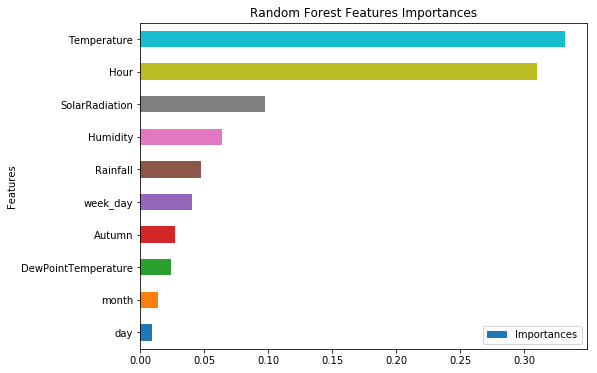

In [114]:
feature_RF = pd.DataFrame({'Features': df.drop("Rented Bike Count", axis=1).columns, 'Importances': rfr1_tune.feature_importances_})

feature_RF.sort_values('Importances', inplace=True)
feature_RF.tail(10).plot(kind='barh', y='Importances', x='Features', figsize=(8, 6), title="Random Forest Features Importances")

#### Gradient Boosting Regressor : 

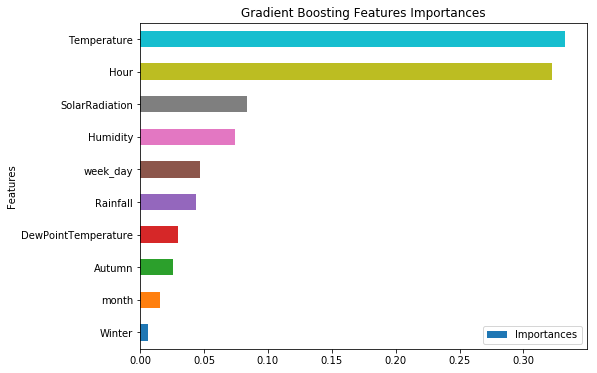

In [115]:
feature_GBM = pd.DataFrame({'Features': df.drop("Rented Bike Count", axis=1).columns, 'Importances': gbm1_tune.feature_importances_})

feature_GBM.sort_values('Importances', inplace=True)
feature_GBM.tail(10).plot(kind='barh', y='Importances', x='Features', figsize=(8, 6), title="Gradient Boosting Features Importances")

#### XGBoost Regressor : 

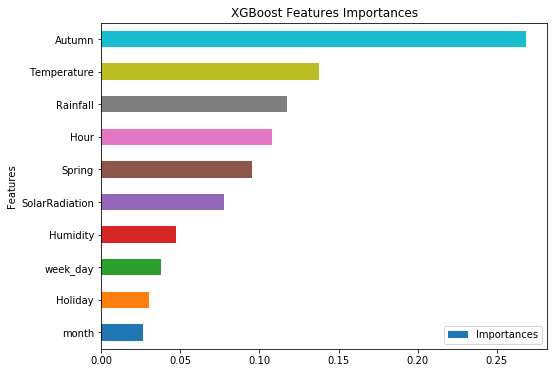

In [116]:
feature_xgb = pd.DataFrame({'Features': df.drop("Rented Bike Count", axis=1).columns, 'Importances': xgb1_tune.feature_importances_})

feature_xgb.sort_values('Importances', inplace=True)
feature_xgb.tail(10).plot(kind='barh', y='Importances', x='Features', figsize=(8, 6), title="XGBoost Features Importances")

Sur les 3 algorithmes, nous pouvons voir que la température et l'heure sont des features très importants. La plui est aussi un feature determinant.

### Score Comparaison :

Comparons à présent la precision entre nos 4 algorithmes : 

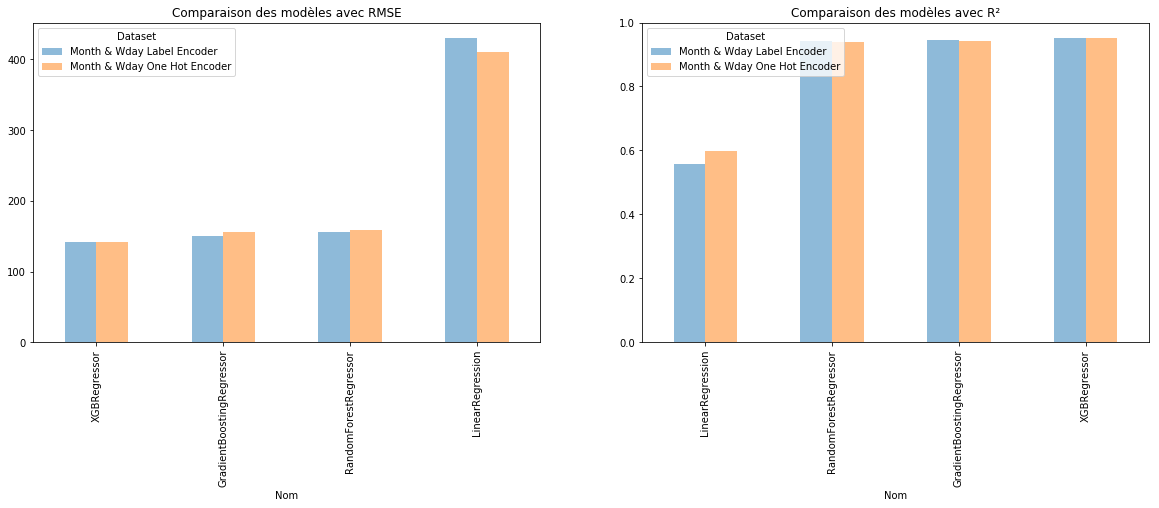

In [117]:
resRMSE = resultat_algo.pivot("Nom", "Dataset", "RMSE").sort_values(by="Month & Wday Label Encoder")
resR2 = resultat_algo.pivot("Nom", "Dataset", "R²").sort_values(by="Month & Wday Label Encoder")

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(321) 
ax2 = fig.add_subplot(322) 
resRMSE.plot(kind='bar', alpha=0.5,title='Comparaison des modèles avec RMSE',ax=ax)
resR2.plot(kind='bar', alpha=0.5,title='Comparaison des modèles avec R²',ax=ax2)

Concernant la précision de nos algorithmes, le XGBoostRegressor semble être le plus adapté à notre problème  même si le GradientBoostingRegressor et le RandomForestRegressor ont des résultats quasiment équivalent. La régression linéaire est en dernière position bien évidement car il ne s'agit pas d'un problème linéaire au vue des visualisations qu'on a pu voir. Ensuite, pour la comapraison entre dataset, on peut voir que c'est plutôt similaire. La mesure R² montre que le LabelEncoder donne un meilleur résultat en général alors que avec le RMSE, c'est le One Hot Encoder qui donne une meilleure précisision.

### Model Exportation for Django App

Pour déployer notre modèle, nous allons d'abord enregistrer notre modèle sous la forme d'un fichier pickle. Nous allons faire de même pour notre normalizer et notre encodeur afin que l'on puisse les réutiliser sur de nouvelles entrées. Nous mettrons ensuite en place une API Django afin d'exposer notre modèle et pouvoir prédire le nombre de vélo loués pour d'autres entrées .

In [565]:
model_file_name='GBM_model.pkl'
joblib.dump(gbm1_tune,model_file_name)  #enregistrement du modèle 

['GBM_model.pkl']

In [119]:
model_test_xgb=joblib.load('GBM_model.pkl') #test avec le modèle enregistré

In [120]:
f_evaluation(Y_test,model_test_xgb.predict(X_test)) #test 

(20047.73393525047, 141.59002060615174, 0.9523095052138109)

In [121]:
f_evaluation(Y_test,xgb1_tune.predict(X_test)) 

(20047.73393525047, 141.59002060615174, 0.9523095052138109)

In [ ]:
df.loc[0].to_json()

In [130]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Holiday,year,month,day,week_day,Autumn,Spring,Summer,Winter
0,254,0,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
1,204,1,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
2,173,2,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
3,107,3,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1
4,78,4,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,0,2017,12,1,4,0,0,0,1


In [125]:
new_namecolumnns=['Temperature','Humidity','Windspeed','Visibility','DewPointTemperature','SolarRadiation','Rainfall','Snowfall']
for i,name in enumerate(col_to_normalize):
    olddf.rename(columns={name: new_namecolumnns[i]}, inplace=True)

In [131]:
#olddf.drop('Functioning Day', axis=1)
#df=df[df['Functioning Day'] == 'Yes'].drop('Functioning Day', axis=1)
olddf.loc[0].to_json()

'{"Date":"01\\/12\\/2017","Rented Bike Count":254,"Hour":0,"Temperature":-5.2,"Humidity":37,"Windspeed":2.2,"Visibility":2000,"DewPointTemperature":-17.6,"SolarRadiation":0.0,"Rainfall":0.0,"Snowfall":0.0,"Seasons":"Winter","Holiday":"No Holiday","Functioning Day":"Yes"}'

In [133]:
olddf=olddf.drop('Functioning Day', axis=1)

In [135]:
olddf.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [568]:
olddf.loc[0].to_json()

'{"Date":"01\\/12\\/2017","Rented Bike Count":254,"Hour":0,"Temperature(\\u00b0C)":-5.2,"Humidity(%)":37,"Wind speed (m\\/s)":2.2,"Visibility (10m)":2000,"Dew point temperature(\\u00b0C)":-17.6,"Solar Radiation (MJ\\/m2)":0.0,"Rainfall(mm)":0.0,"Snowfall (cm)":0.0,"Seasons":"Winter","Holiday":"No Holiday","Functioning Day":"Yes"}'